In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import Operators as op
import SensingMatrix as sm
import Measurements as me
from SetUpImage import setUpImage
from Displays import phase_retrie_plots
import solve

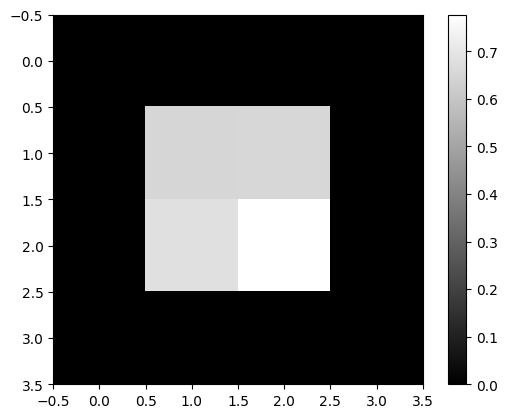

In [3]:
Nx, Ny = 4, 4
n = Nx * Ny
true_images, mask = setUpImage(Nx, Ny) 

#map.f(x_true) < 1e-5

plt.imshow(true_images[1].imag, cmap='gray')
plt.colorbar()

In [4]:
x_true = true_images[1]
x_true_vect = x_true.reshape(Nx * Ny, )

#print("x_true_vect", x_true_vect)
#x = (1 + 2j)*np.ones(x_true_vect.shape)

#noise_lvl = 0.e-4
A = sm.FourierMatrix(Nx,Ny) #sm.iid_stdd_Gauss(Nx,Ny)
#print("A.Matrix", A.Matrix)
#meas, noise = me.gauss_noisy_meas(x_true_vect, noise_lvl , A)()
#map = op.operators(algo = 'complex mirror', meas = meas, A = A)
#map.f( x)
#print(map.psi(2 * x), map.psi(1 * x), map.breg_psi(2 * x, x))

iteration k 0
a 1274.4285879459328
t 0.0893999723997635
a 223.7728937628496
t 0.1556801272029273
a 1050.6556941830834
t 0.09514222450240149
a 1217.872970473318
t 0.09071909175055713
a 209.62453363768063
t 0.15890388175240663
a 1008.2484368356372
t 0.09641268749822056
a 702.3420897825077
t 0.1082828012945163
a 93.71499111607775
t 0.20403079962775988
a 608.6270986664299
t 0.11336137889615287
a 1217.872970473318
t 0.09071909175055713
a 209.62453363768063
t 0.15890388175240663
a 1008.2484368356372
t 0.09641268749822056
iterate 1
a 1212.0193319400082
t 0.09086020393332409
a 208.18385555785792
t 0.15924787371028434
a 1003.8354763821501
t 0.09654890863137146
a 1159.3003397711882
t 0.09217272376464403
a 195.146406815708
t 0.16250751636819785
a 964.1539329554801
t 0.09781013441117949
a 677.4150061249518
t 0.10954334306727034
a 88.0423785646611
t 0.2079770144455933
a 589.3726275602907
t 0.11453220015958532
a 1159.3003397711882
t 0.09217272376464403
a 195.146406815708
t 0.16250751636819785
a 964.

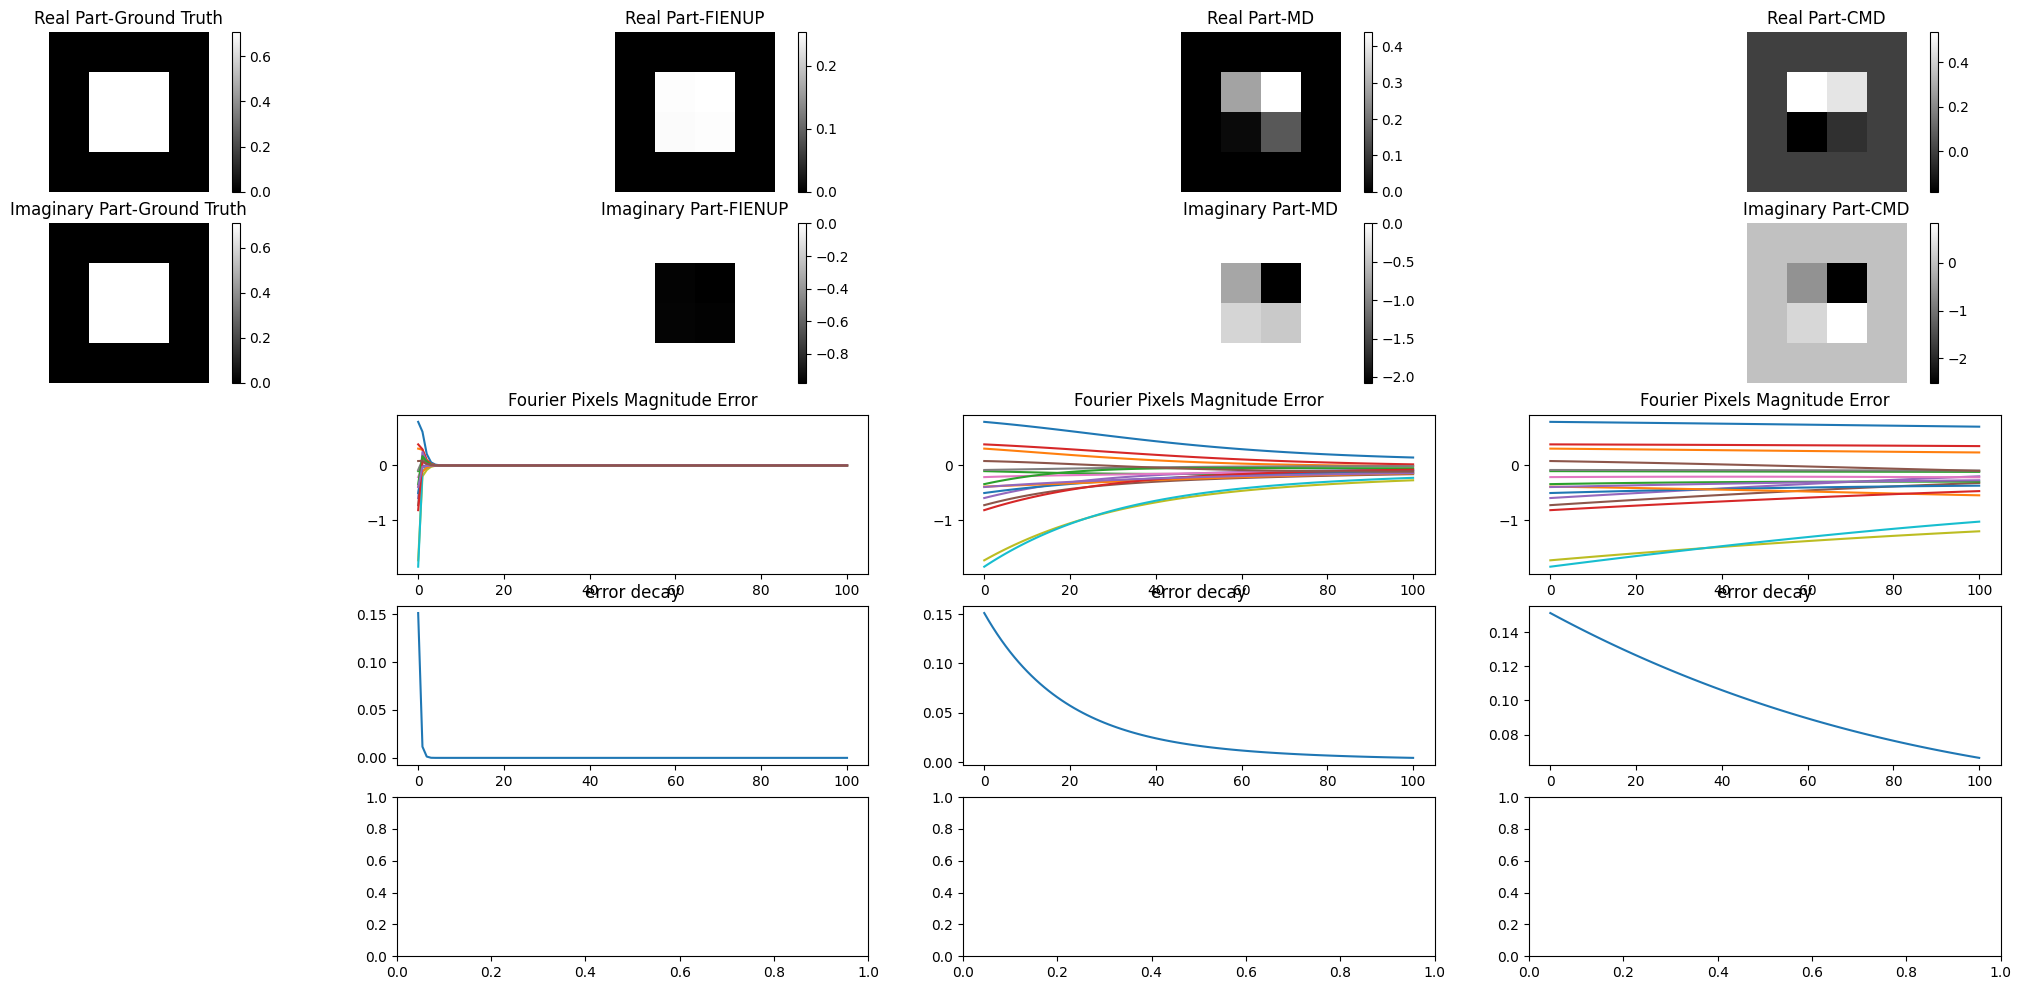

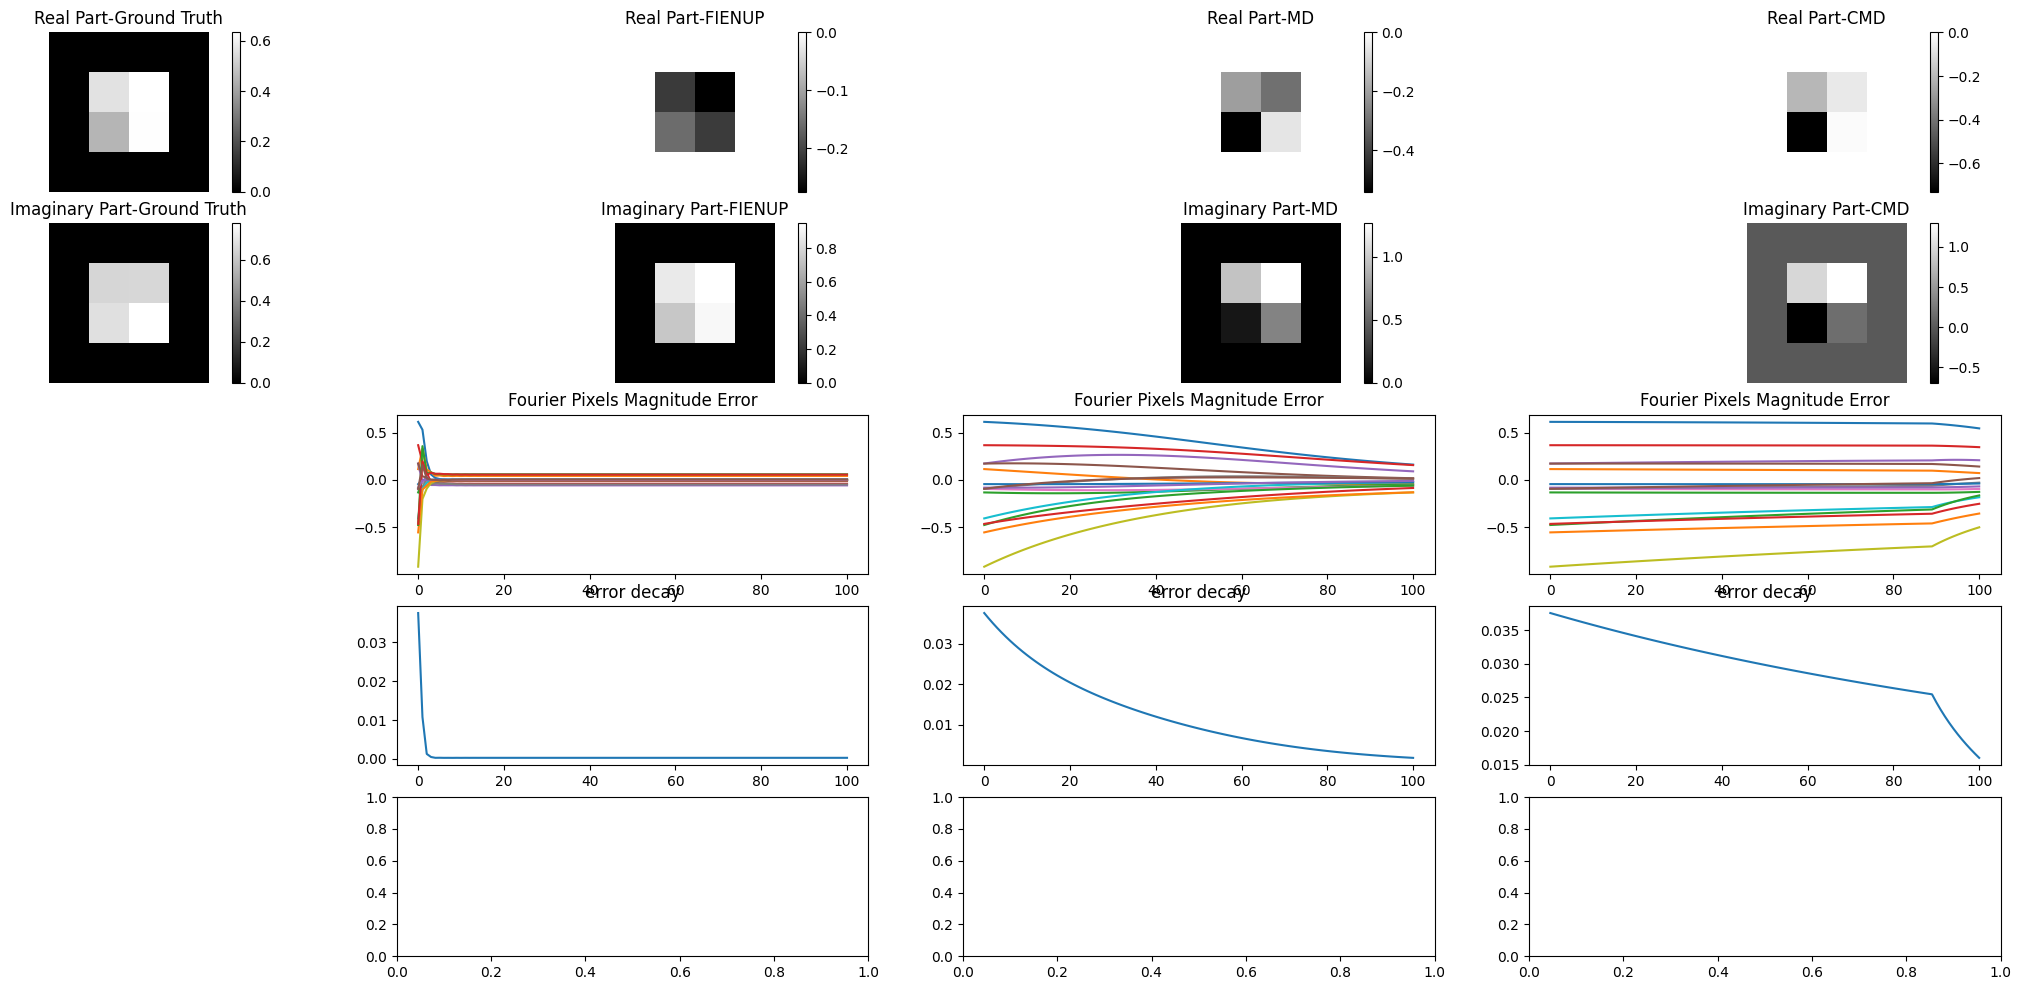

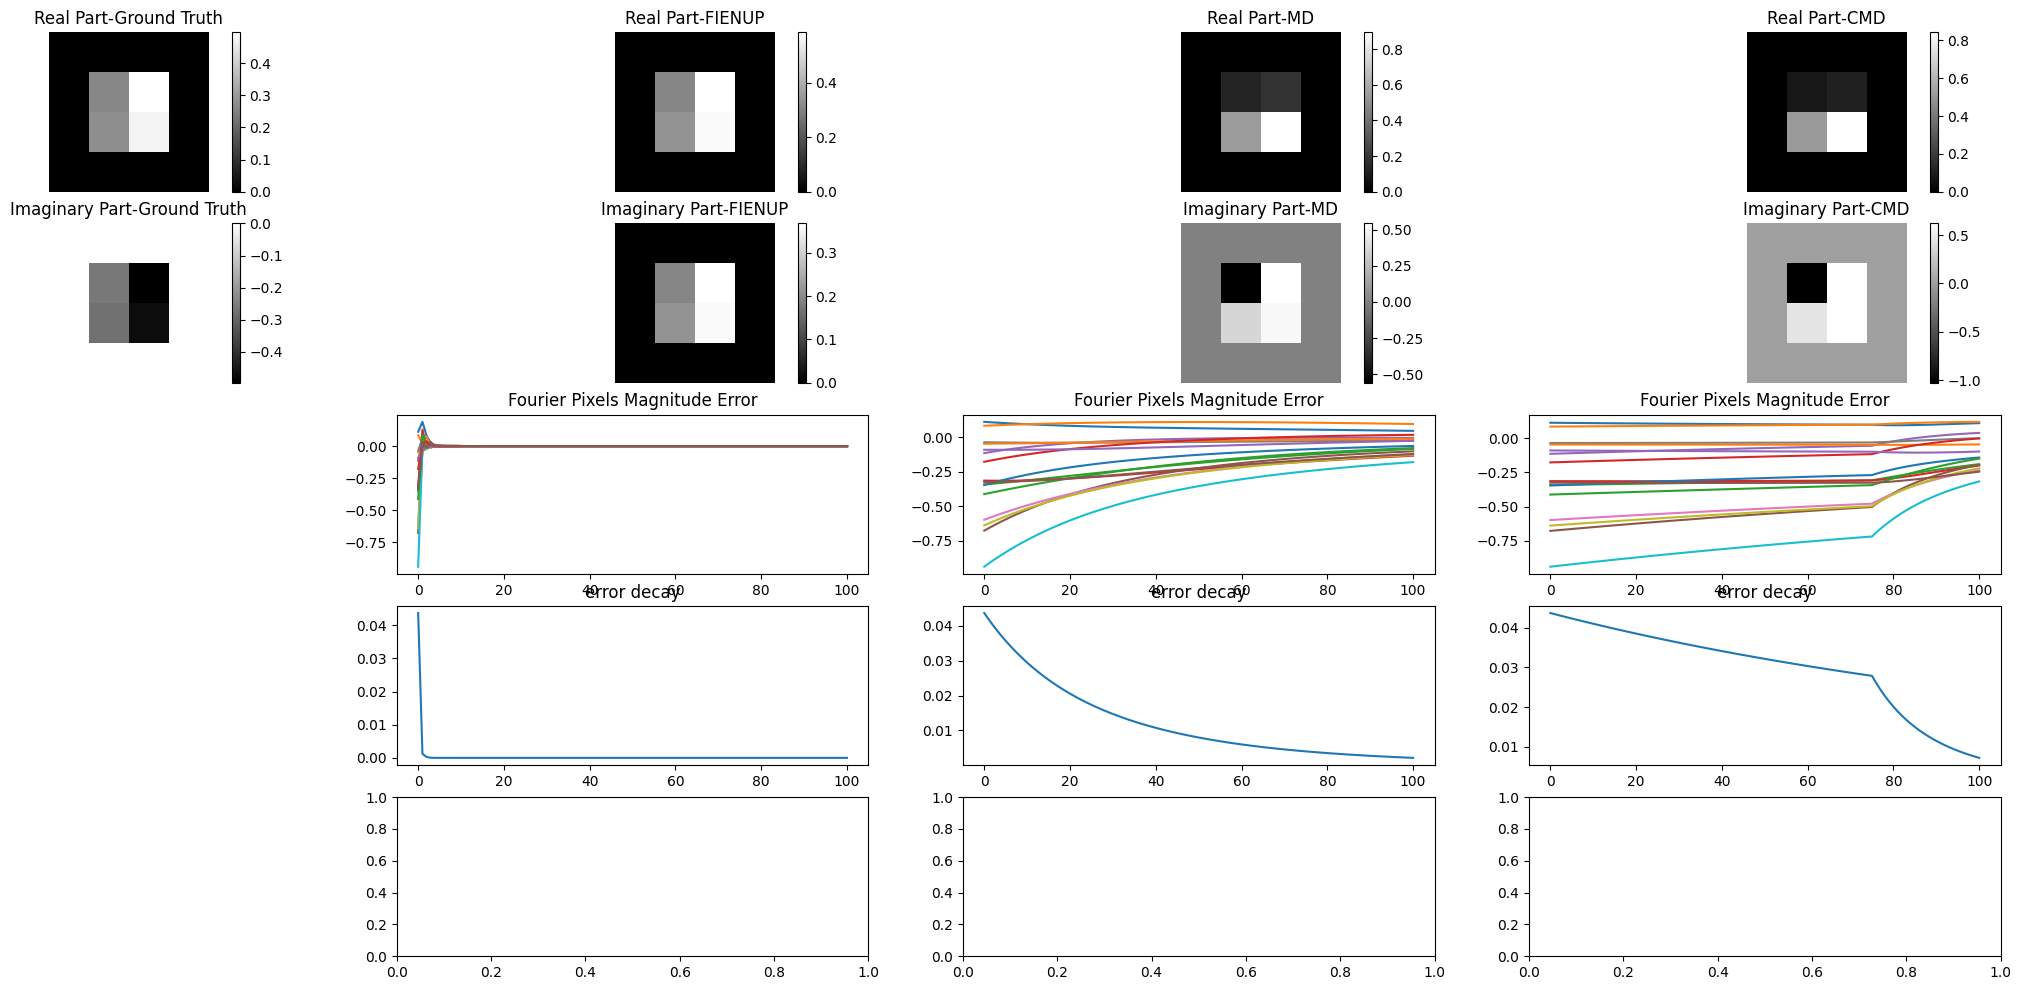

In [6]:
idx = np.arange(len(true_images)) #[0, 1] # np.arange(1) 
Algos = ['FIENUP', 'real mirror', 'complex mirror' ]

#fig = plt.figure(figsize=(28,12))
for i in idx:
    X_sols = []
    x_true = true_images[i]
    x_true_vect = x_true.reshape(Nx * Ny, )
    maxiter = 100
    kappa  = 0.9
    xi = 12
    noise_lvl = 1.e-4
    meas, noise = me.gauss_noisy_meas(x_true_vect, noise_lvl , A)()
    L = 1 * op.smoothnessPara_L(A.Matrix, noise)
    #print("meas", meas)
    x0 = op.initialise(n, meas, A.Matrix, type ='Gaussian', real = 1, imag = 1, x_true_vect = x_true_vect, mask = mask, noise_lvl = noise_lvl**(0.5) )
    for Algo in Algos:
        map = op.operators(algo = Algo, meas = meas, A = A) 
        x_sols = solve.phase_retrieval(L, kappa, xi, Algo, map, mask, n, A.Matrix, meas, maxiter, x0 )
        X_sols.append(x_sols)
    phase_retrie_plots(i, true_images, X_sols, map, A, meas, maxiter)